# Import Libraries

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import plotly.express as px
import plotly.graph_objs as go

## Import Dataset

In [5]:
data = pd.read_csv("student_performance_data.csv")

## Understand The Dataset

In [8]:
data.head()

Unnamed: 0  StudentID  Age  Gender  Ethnicity ParentalEducation  \
0           0       1001   36  Female  Caucasian      Some College   
1           1       1002   18    Male  Caucasian       High School   
2           2       1003   15    Male      Asian        Bachelor's   
3           3       1004   17  Female  Caucasian        Bachelor's   
4           4       1005   36  Female  Caucasian      Some College   

   StudyTimeWeekly  Absences  Tutoring ParentalSupport  Extracurricular  \
0        19.833723       NaN         1        Moderate                0   
1        15.408756       0.0         0             Low                0   
2         4.210570      26.0         0        Moderate                0   
3        10.028829      14.0         0            High                1   
4         4.672495      17.0         1             NaN                0   

   Sports  Music  Volunteering       GPA  GradeClass  
0       0      1             0  2.929196           2  
1       0      0             0  3.042915           1  
2       0      0             0  0.112602           4  
3       0      0             0  2.054218           3  
4       0      0             0  1.288061           4

In [10]:
data.tail()

Unnamed: 0  StudentID  Age  Gender         Ethnicity ParentalEducation  \
2745         910       1911   17    Male  African American      Some College   
2746        1846       2847   18  Female             Asian      Some College   
2747        1560       2561   17  Female             Other      Some College   
2748        1559       2560   17    Male             Asian        Bachelor's   
2749         349       1350   17  Female         Caucasian               NaN   

      StudyTimeWeekly  Absences  Tutoring ParentalSupport  Extracurricular  \
2745        39.443676      12.0         0             Low                1   
2746         9.699846      11.0         0             NaN                1   
2747         7.821845      20.0         0            High                0   
2748        19.641548      17.0         0       Very High                1   
2749        12.253687       4.0         0        Moderate                0   

      Sports  Music  Volunteering       GPA  GradeClass  
2745       1      0             0  2.478699           3  
2746       0      0             1  2.506415           2  
2747       0      0             0  1.615572           4  
2748       1      1             0  2.495379           3  
2749       0      0             0  2.833760           2

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2750 non-null   int64  
 1   StudentID          2750 non-null   int64  
 2   Age                2750 non-null   int64  
 3   Gender             2750 non-null   object 
 4   Ethnicity          2750 non-null   object 
 5   ParentalEducation  2470 non-null   object 
 6   StudyTimeWeekly    2497 non-null   float64
 7   Absences           2616 non-null   float64
 8   Tutoring           2750 non-null   int64  
 9   ParentalSupport    2129 non-null   object 
 10  Extracurricular    2750 non-null   int64  
 11  Sports             2750 non-null   int64  
 12  Music              2750 non-null   int64  
 13  Volunteering       2750 non-null   int64  
 14  GPA                2694 non-null   float64
 15  GradeClass         2750 non-null   int64  
dtypes: float64(3), int64(9),

#### Statistical Summary

In [14]:
data.describe()

Unnamed: 0    StudentID          Age  StudyTimeWeekly     Absences  \
count  2750.000000  2750.000000  2750.000000      2497.000000  2616.000000   
mean   1192.147273  2193.147273    17.457455        12.411645    14.475917   
std     691.007831   691.007831     4.386416         9.983847     8.467562   
min       0.000000  1001.000000    15.000000         0.004859     0.000000   
25%     596.250000  1597.250000    16.000000         5.480236     7.000000   
50%    1190.500000  2191.500000    17.000000        10.463163    14.000000   
75%    1789.000000  2790.000000    18.000000        16.195771    22.000000   
max    2391.000000  3392.000000    36.000000        39.443676    29.000000   

          Tutoring  Extracurricular       Sports        Music  Volunteering  \
count  2750.000000      2750.000000  2750.000000  2750.000000   2750.000000   
mean      0.301091         0.318545     0.302909     0.194909      0.155273   
std       0.458816         0.465997     0.459600     0.396203      0.362230   
min       0.000000         0.000000     0.000000     0.000000      0.000000   
25%       0.000000         0.000000     0.000000     0.000000      0.000000   
50%       0.000000         0.000000     0.000000     0.000000      0.000000   
75%       1.000000         1.000000     1.000000     0.000000      0.000000   
max       1.000000         1.000000     1.000000     1.000000      1.000000   

               GPA   GradeClass  
count  2694.000000  2750.000000  
mean      1.913705     2.980727  
std       0.913915     1.231037  
min       0.000000     0.000000  
25%       1.182671     2.000000  
50%       1.918459     4.000000  
75%       2.625844     4.000000  
max       4.000000     4.000000

### Data Cleaning

#### Checking for missing values in data

In [20]:
data.isnull()

Unnamed: 0  StudentID    Age  Gender  Ethnicity  ParentalEducation  \
0          False      False  False   False      False              False   
1          False      False  False   False      False              False   
2          False      False  False   False      False              False   
3          False      False  False   False      False              False   
4          False      False  False   False      False              False   
...          ...        ...    ...     ...        ...                ...   
2745       False      False  False   False      False              False   
2746       False      False  False   False      False              False   
2747       False      False  False   False      False              False   
2748       False      False  False   False      False              False   
2749       False      False  False   False      False               True   

      StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0               False      True     False            False            False   
1               False     False     False            False            False   
2               False     False     False            False            False   
3               False     False     False            False            False   
4               False     False     False             True            False   
...               ...       ...       ...              ...              ...   
2745            False     False     False            False            False   
2746            False     False     False             True            False   
2747            False     False     False            False            False   
2748            False     False     False            False            False   
2749            False     False     False            False            False   

      Sports  Music  Volunteering    GPA  GradeClass  
0      False  False         False  False       False  
1      False  False         False  False       False  
2      False  False         False  False       False  
3      False  False         False  False       False  
4      False  False         False  False       False  
...      ...    ...           ...    ...         ...  
2745   False  False         False  False       False  
2746   False  False         False  False       False  
2747   False  False         False  False       False  
2748   False  False         False  False       False  
2749   False  False         False  False       False  

[2750 rows x 16 columns]

In [22]:
data.isnull().sum()

Unnamed: 0             0
StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    280
StudyTimeWeekly      253
Absences             134
Tutoring               0
ParentalSupport      621
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                   56
GradeClass             0
dtype: int64

#### Visualise the missing values

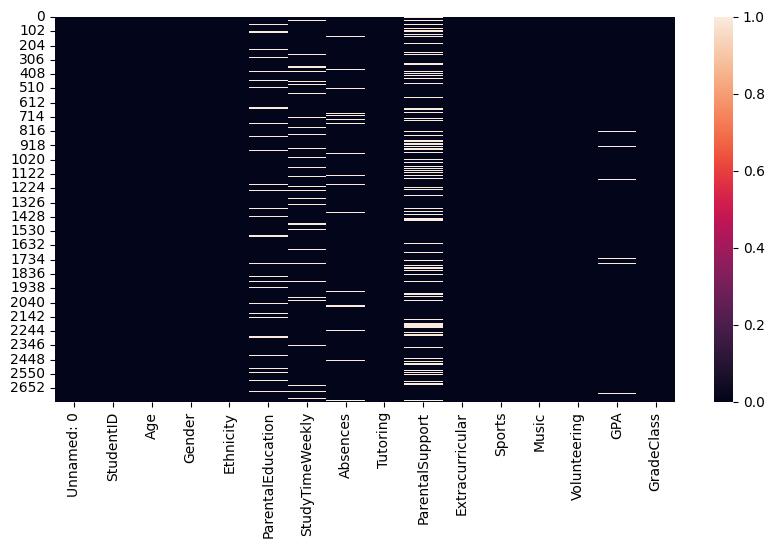

In [25]:
plt.figure(figsize=(10,5)) # Set the figsize of the visual
sns.heatmap(data.isnull()) # set the function to be involve in the visual
plt.show() # Display the visualisation

In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

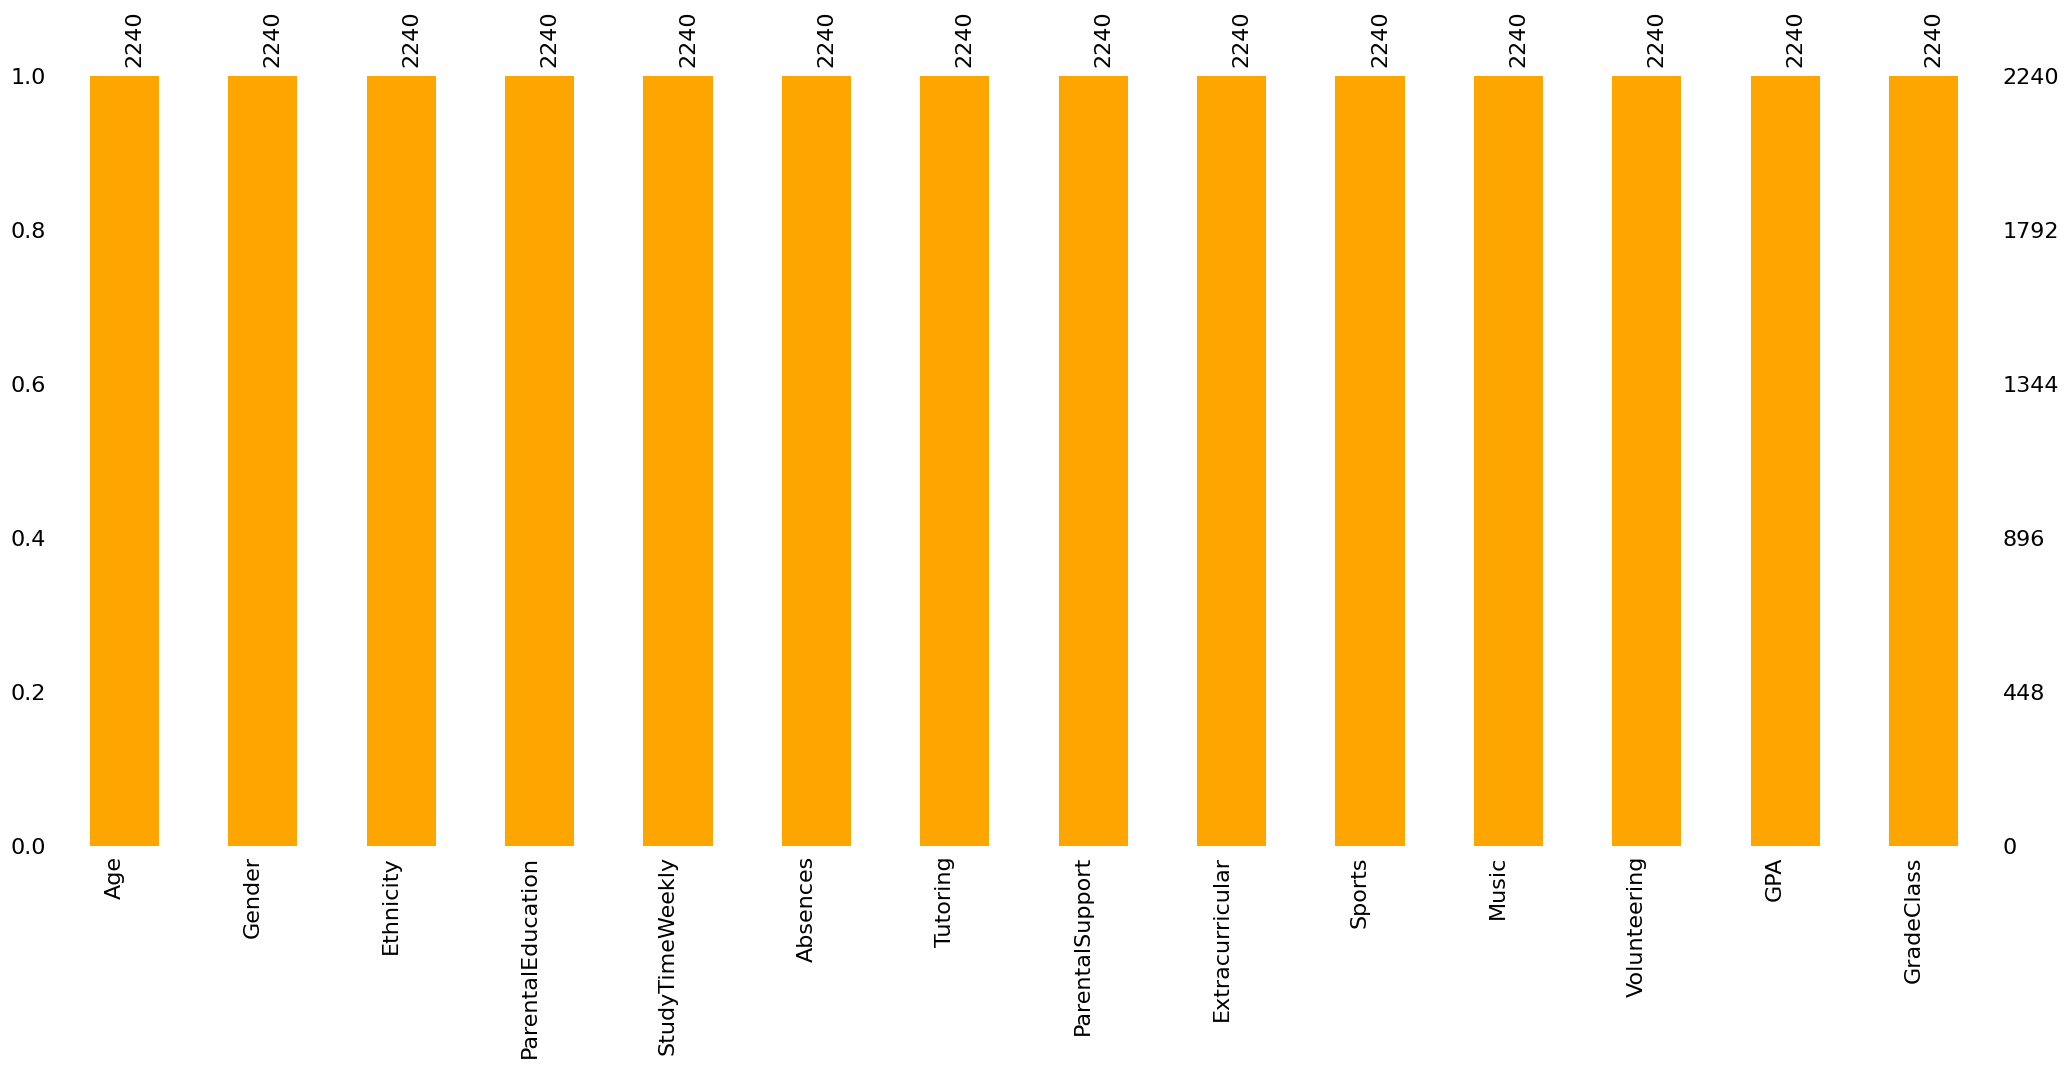

In [73]:
msn.bar(data, color="orange", label_rotation=90) # To visualise the missing data

#### Drop irrelevant columns/features

In [36]:
data.drop(["Unnamed: 0","StudentID"], axis=1, inplace=True)

#### Confirm the columns/features are removed

In [39]:
data.head()

Age  Gender  Ethnicity ParentalEducation  StudyTimeWeekly  Absences  \
0   36  Female  Caucasian      Some College        19.833723       NaN   
1   18    Male  Caucasian       High School        15.408756       0.0   
2   15    Male      Asian        Bachelor's         4.210570      26.0   
3   17  Female  Caucasian        Bachelor's        10.028829      14.0   
4   36  Female  Caucasian      Some College         4.672495      17.0   

   Tutoring ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1        Moderate                0       0      1             0   
1         0             Low                0       0      0             0   
2         0        Moderate                0       0      0             0   
3         0            High                1       0      0             0   
4         1             NaN                0       0      0             0   

        GPA  GradeClass  
0  2.929196           2  
1  3.042915           1  
2  0.112602           4  
3  2.054218           3  
4  1.288061           4

#### Handling of missing values

In [42]:
numerical_data = data.select_dtypes(include="number")
numerical_column = numerical_data.columns
numerical_column

Index(['Age', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular',
       'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [44]:
categorical_data = data.select_dtypes(include="object")
categorical_column = categorical_data.columns
categorical_column

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'], dtype='object')

In [46]:
data.dropna(subset=["StudyTimeWeekly", "GPA"], inplace=True)

In [48]:
data["Absences"] = data["Absences"].fillna(data["Absences"].median())

In [50]:
data["ParentalSupport"] = data["ParentalSupport"].fillna(data["ParentalSupport"].mode().iloc[0])

In [52]:
data["ParentalEducation"] = data["ParentalEducation"].fillna(data["ParentalEducation"].mode().iloc[0])

In [54]:
data.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

#### Checking for duplicated data

In [61]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2745    False
2746     True
2747     True
2748    False
2749     True
Length: 2447, dtype: bool

In [63]:
data.duplicated().sum()

207

In [65]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### Univariate Analysis

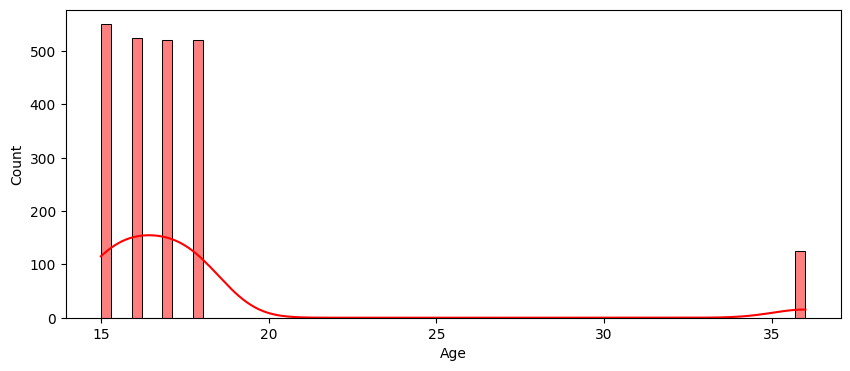

In [71]:
# variable/Features/Columns

# Check the distribution of the student Age

plt.figure(figsize=(10, 4))
sns.histplot(data["Age"], color="red", kde=True)
plt.show()

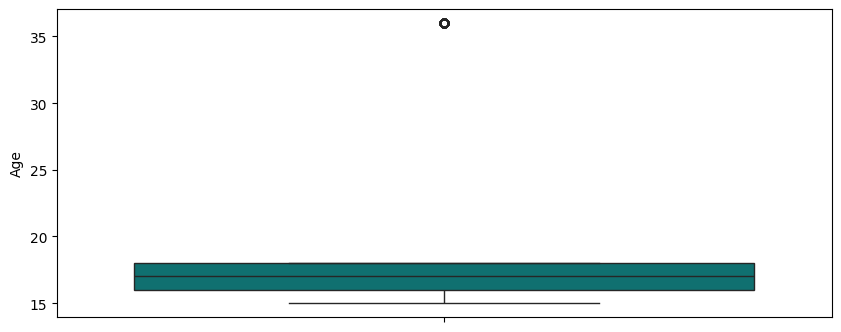

In [75]:
plt.figure(figsize=(10, 4))
sns.boxplot(data["Age"], color="teal",)
plt.show()

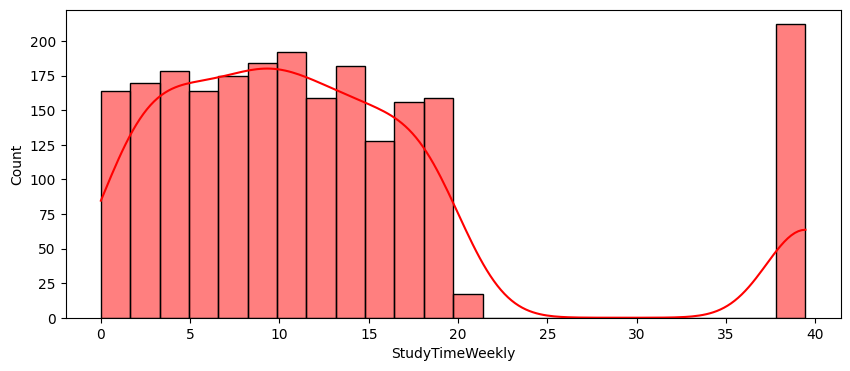

In [77]:
# Check the distribution of the student Study Time on weekly bases

plt.figure(figsize=(10, 4))
sns.histplot(data["StudyTimeWeekly"], color="red", kde=True)
plt.show()

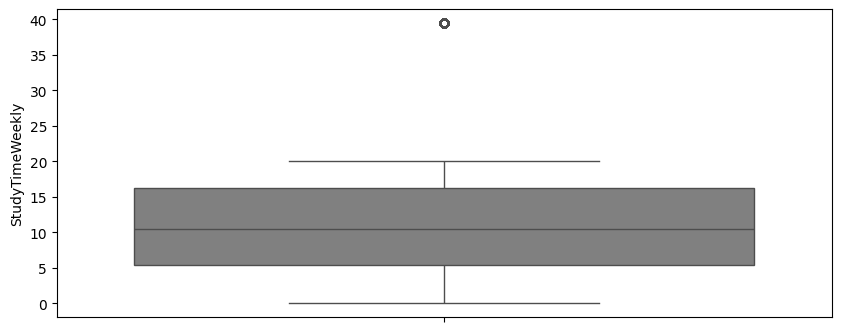

In [81]:
plt.figure(figsize=(10, 4))
sns.boxplot(data["StudyTimeWeekly"], color="grey")
plt.show()

#### Subplotting

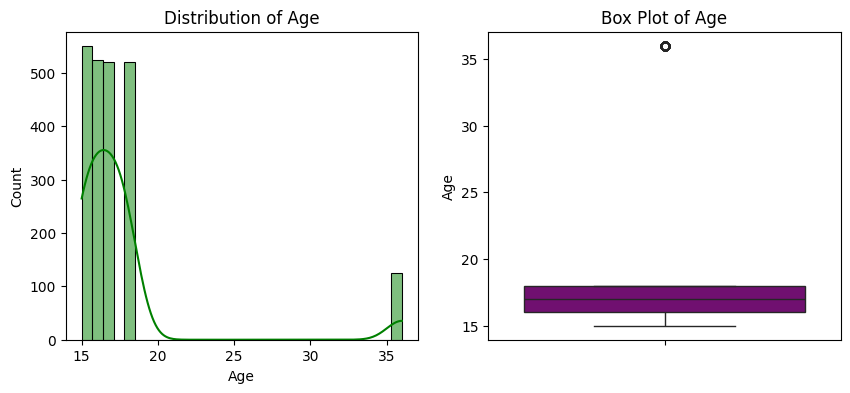

In [84]:
# Subplot the Age distribution


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data["Age"], bins=30, color="green", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Age")

sns.boxplot(data["Age"], color="purple", ax=axes[1])
axes[1].set_title("Box Plot of Age")

plt.show()

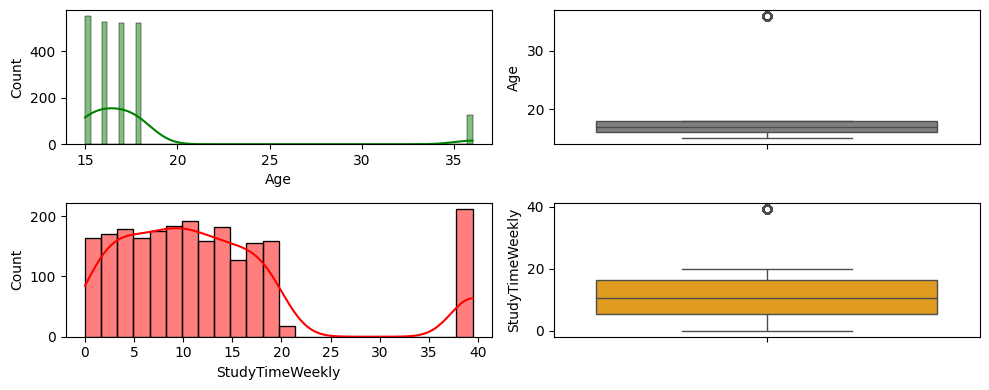

In [88]:
# Subplot the Student Study time

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
sns.histplot(data["Age"], color="green", kde=True, ax=axes[0,0])
sns.boxplot(data["Age"], color="grey",ax=axes[0,1])
sns.histplot(data["StudyTimeWeekly"], color="red", kde=True,ax=axes[1,0] )
sns.boxplot(data["StudyTimeWeekly"], color="orange", ax=axes[1,1])

plt.tight_layout()
plt.show()

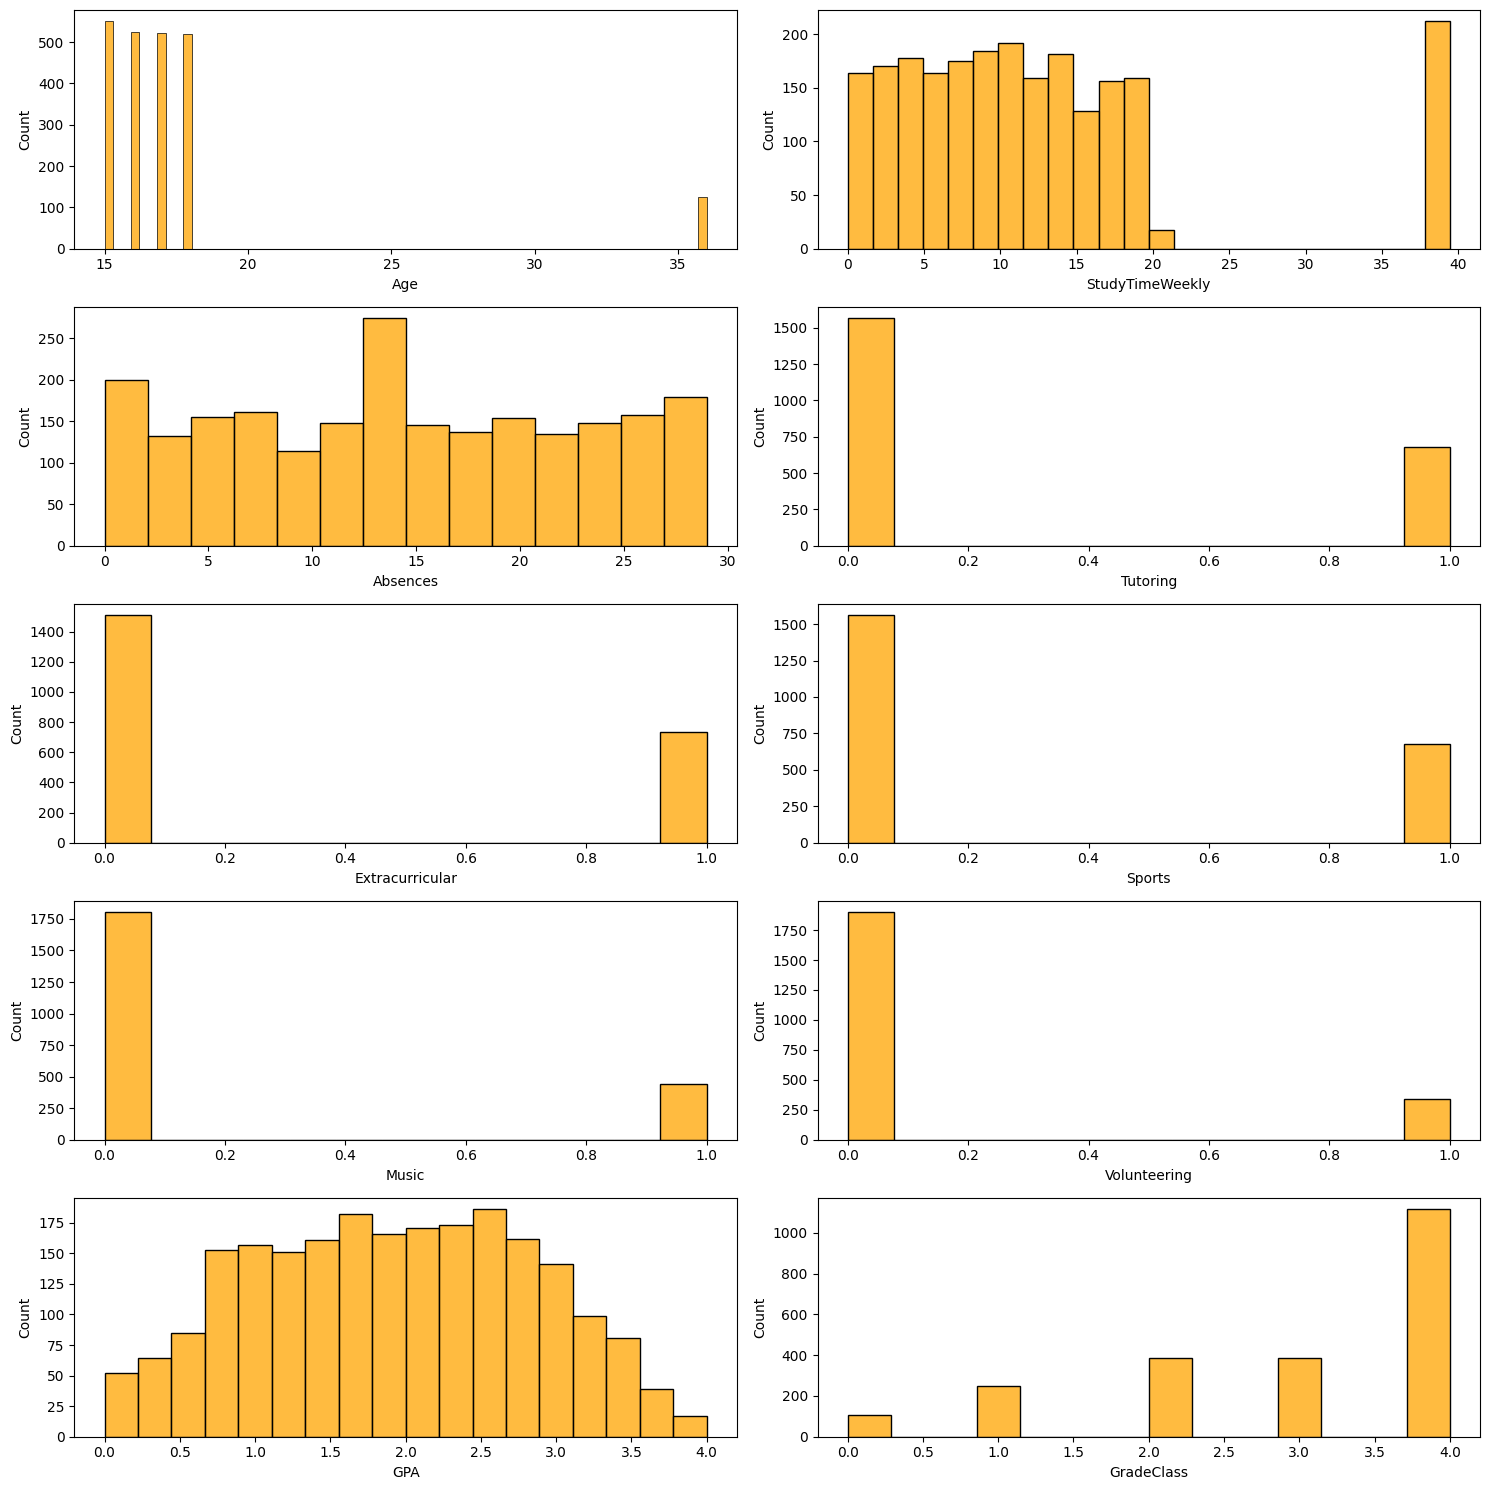

In [90]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for index, column_name in enumerate(numerical_column):
    sns.histplot(data[column_name], color="orange", kde=False ,ax=axes[index])

plt.tight_layout()
plt.show()

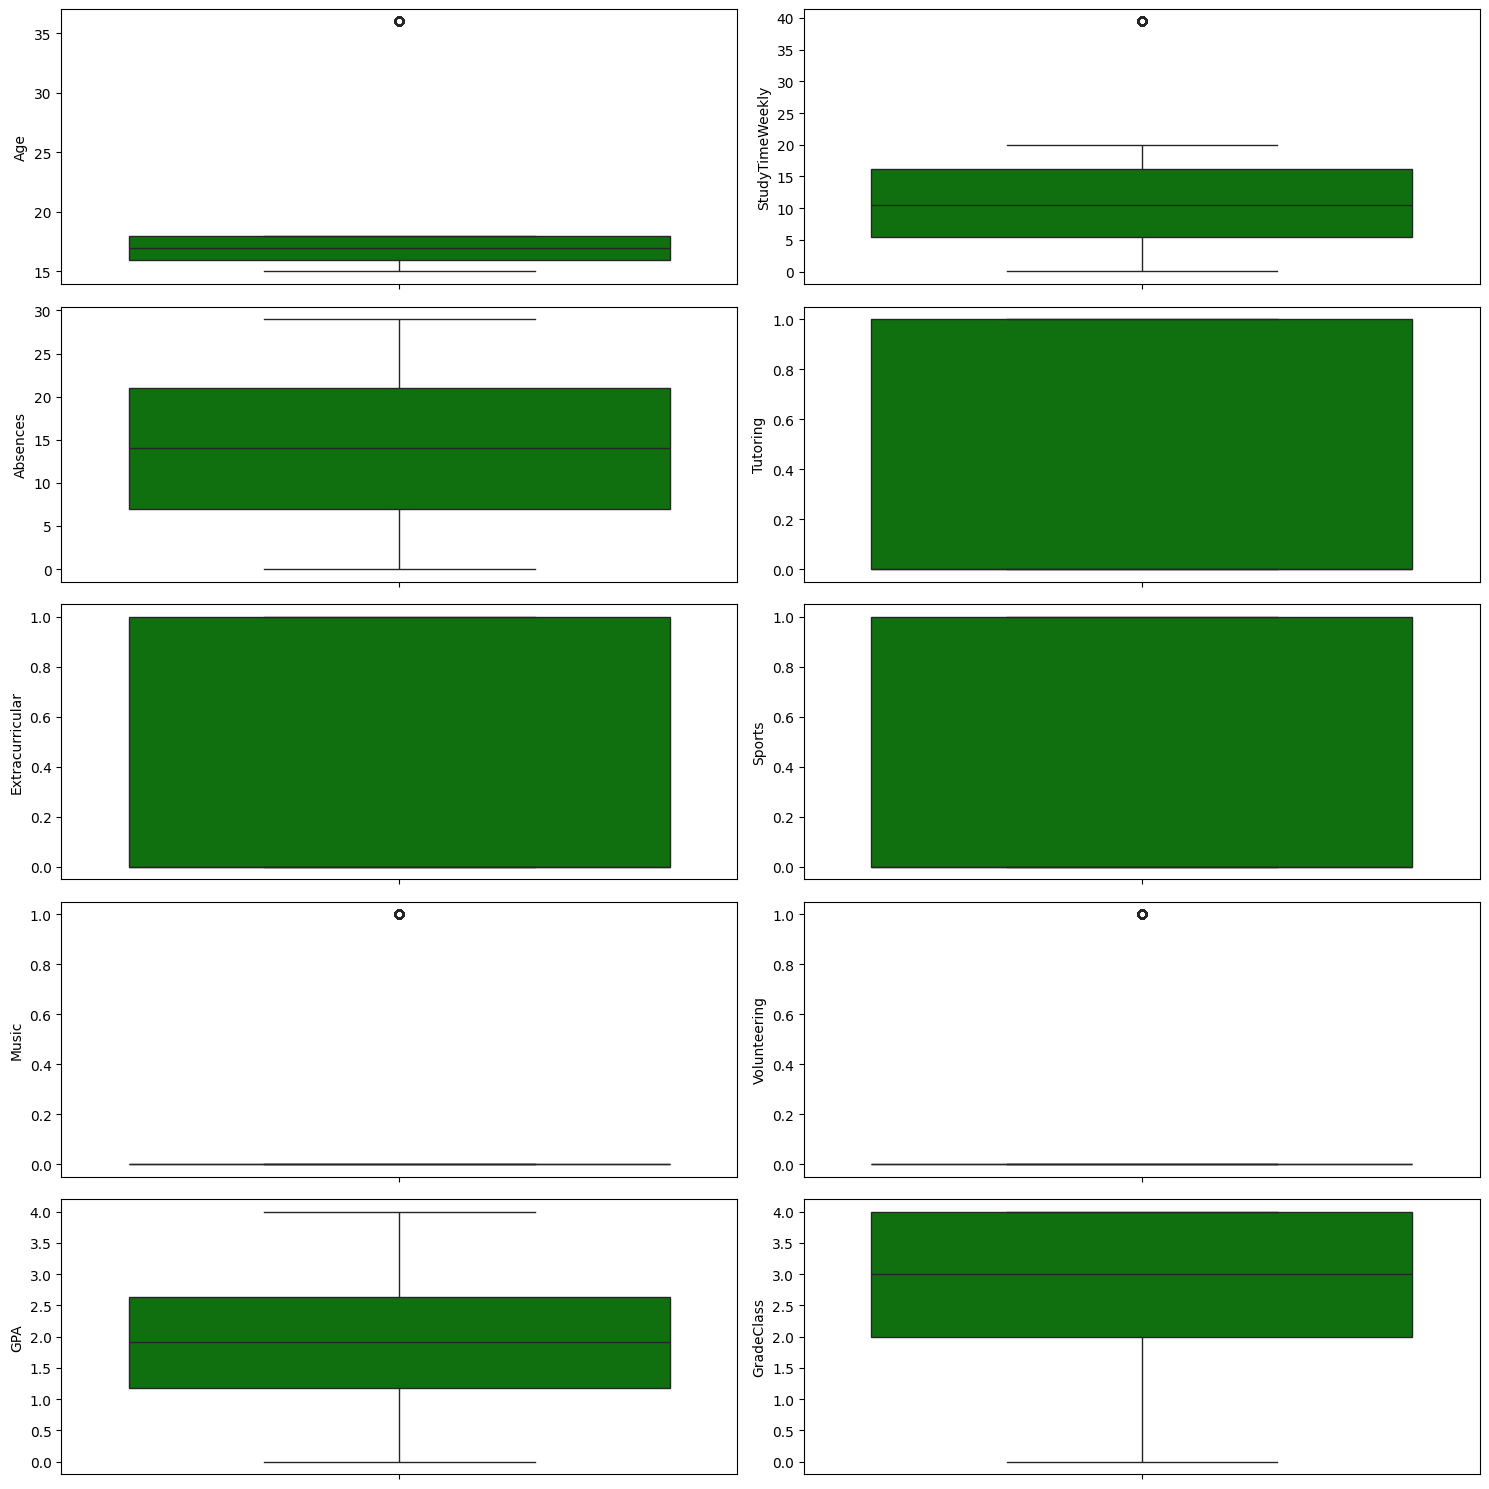

In [92]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for index, column_name in enumerate(numerical_column):
    sns.boxplot(data[column_name], color="green", ax=axes[index])

plt.tight_layout()
plt.show()

#### Handle Outliers

In [95]:
data.head()

Age  Gender  Ethnicity ParentalEducation  StudyTimeWeekly  Absences  \
0   36  Female  Caucasian      Some College        19.833723      14.0   
1   18    Male  Caucasian       High School        15.408756       0.0   
2   15    Male      Asian        Bachelor's         4.210570      26.0   
3   17  Female  Caucasian        Bachelor's        10.028829      14.0   
4   36  Female  Caucasian      Some College         4.672495      17.0   

   Tutoring ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1        Moderate                0       0      1             0   
1         0             Low                0       0      0             0   
2         0        Moderate                0       0      0             0   
3         0            High                1       0      0             0   
4         1        Moderate                0       0      0             0   

        GPA  GradeClass  
0  2.929196           2  
1  3.042915           1  
2  0.112602           4  
3  2.054218           3  
4  1.288061           4

In [97]:
#iqr = q3 - q1
q1 = data[["Age", "StudyTimeWeekly"]].quantile(0.25)
q3 = data[["Age", "StudyTimeWeekly"]].quantile(0.75)
iqr = q3 - q1
iqr

Age                 2.000000
StudyTimeWeekly    10.867134
dtype: float64

In [99]:
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [101]:
lower_bound

Age                13.000000
StudyTimeWeekly   -10.921007
dtype: float64

In [103]:
upper_bound

Age                21.000000
StudyTimeWeekly    32.547529
dtype: float64

In [105]:
outliers = (data[["Age", "StudyTimeWeekly"]] < lower_bound) | (data[["Age", "StudyTimeWeekly"]] > upper_bound)
outliers

Age  StudyTimeWeekly
0      True            False
1     False            False
2     False            False
3     False            False
4      True            False
...     ...              ...
2741  False            False
2743  False            False
2744  False            False
2745  False             True
2748  False            False

[2240 rows x 2 columns]

In [107]:
outliers = ((data[["Age", "StudyTimeWeekly"]] < lower_bound) | (data[["Age", "StudyTimeWeekly"]] > upper_bound)).any(axis=1)
outliers

0        True
1       False
2       False
3       False
4        True
        ...  
2741    False
2743    False
2744    False
2745     True
2748    False
Length: 2240, dtype: bool

In [109]:
data = data[~outliers]
data

Age  Gender         Ethnicity ParentalEducation  StudyTimeWeekly  \
1      18    Male         Caucasian       High School        15.408756   
2      15    Male             Asian        Bachelor's         4.210570   
3      17  Female         Caucasian        Bachelor's        10.028829   
5      18    Male         Caucasian       High School         8.191219   
7      15  Female  African American            Higher        15.424496   
...   ...     ...               ...               ...              ...   
2740   18  Female         Caucasian      Some College        12.475444   
2741   17    Male         Caucasian       High School         1.979372   
2743   17    Male             Asian      Some College         5.419264   
2744   18    Male             Asian      Some College         1.760121   
2748   17    Male             Asian        Bachelor's        19.641548   

      Absences  Tutoring ParentalSupport  Extracurricular  Sports  Music  \
1          0.0         0             Low                0       0      0   
2         26.0         0        Moderate                0       0      0   
3         14.0         0            High                1       0      0   
5          0.0         0        Moderate                1       0      0   
7         22.0         1             Low                1       0      0   
...        ...       ...             ...              ...     ...    ...   
2740       1.0         1        Moderate                0       0      1   
2741      14.0         1            High                1       0      0   
2743       6.0         0        Moderate                0       0      0   
2744      14.0         0        Moderate                0       0      0   
2748      17.0         0       Very High                1       1      1   

      Volunteering       GPA  GradeClass  
1                0  3.042915           1  
2                0  0.112602           4  
3                0  2.054218           3  
5                0  3.084184           1  
7                0  1.360143           4  
...            ...       ...         ...  
2740             0  3.572945           1  
2741             0  2.877854           2  
2743             0  2.504005           2  
2744             0  1.567412           4  
2748             0  2.495379           3  

[1915 rows x 14 columns]

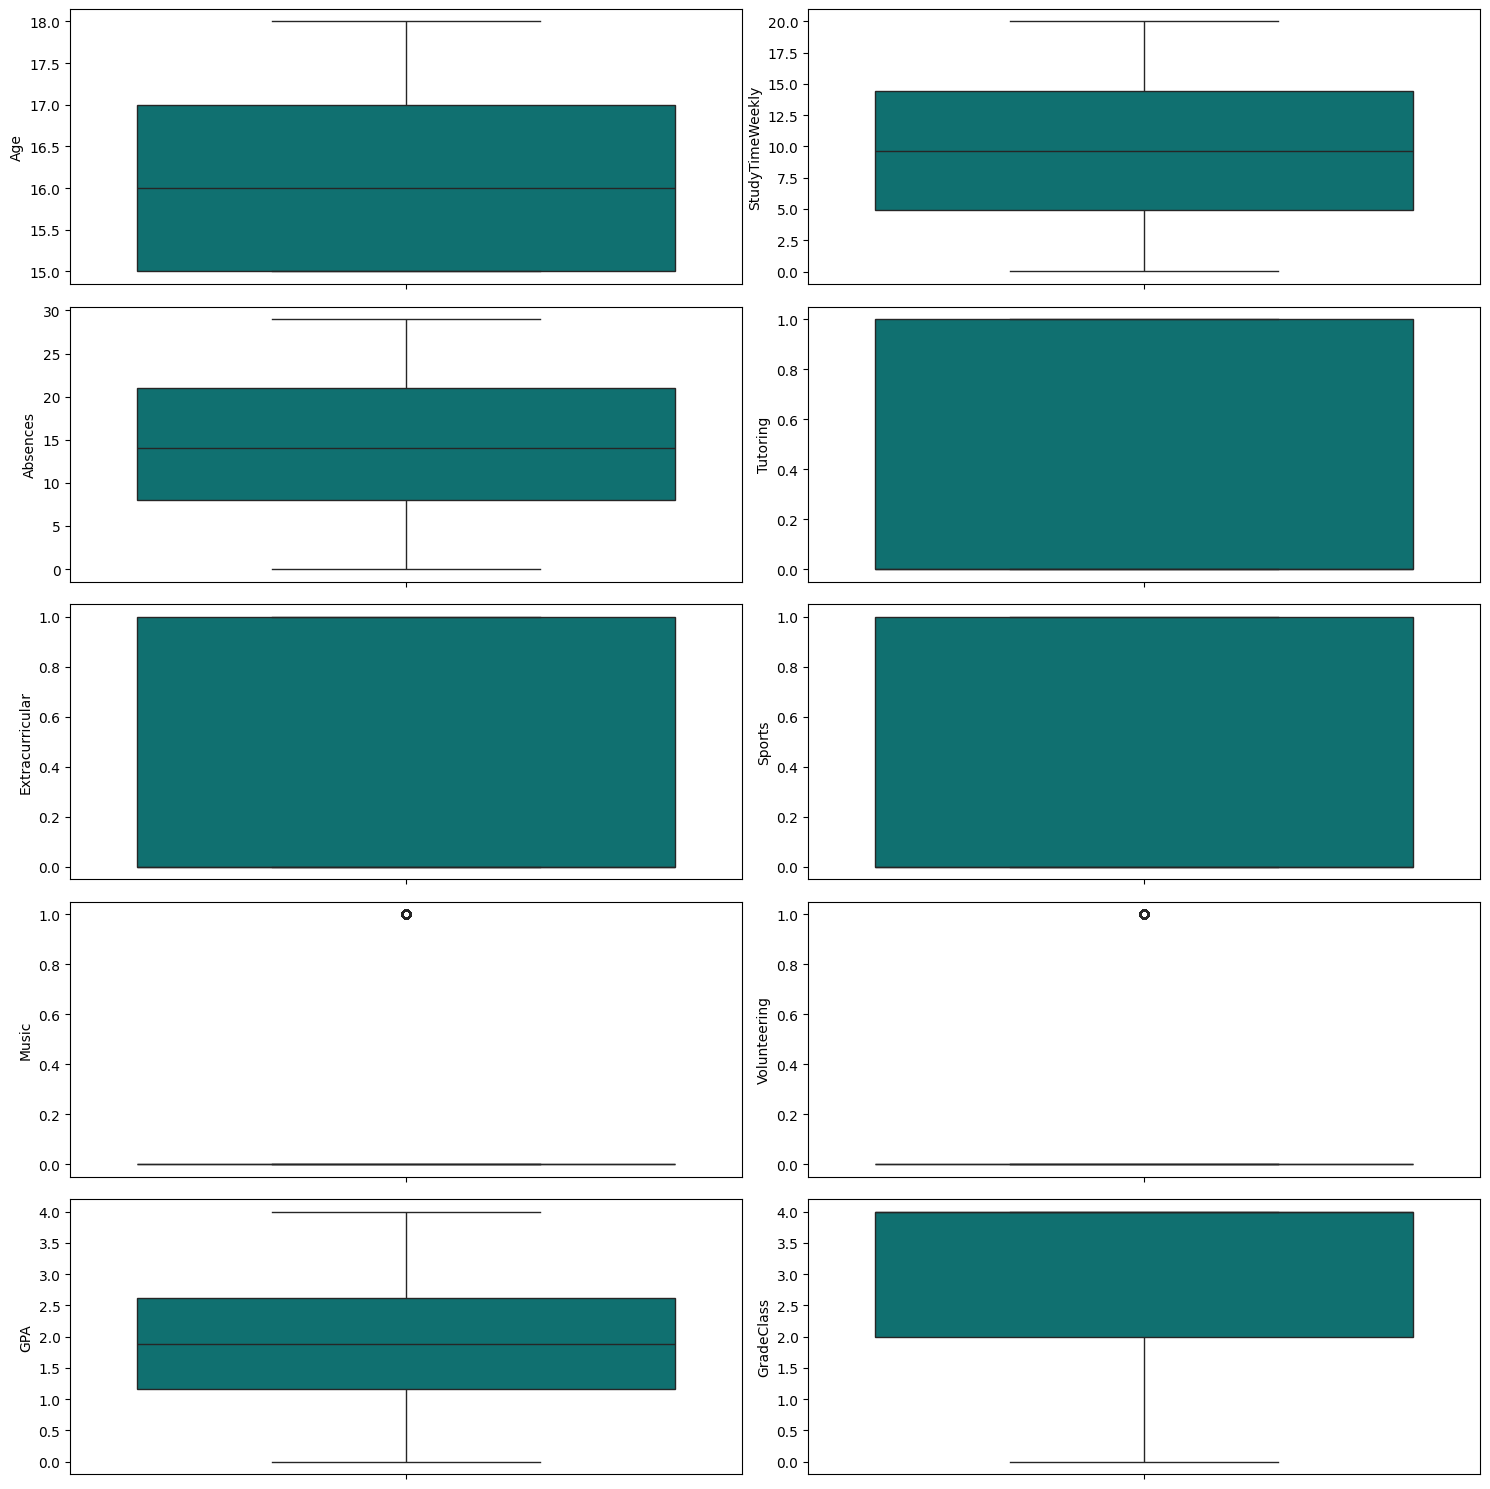

In [111]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for index, column_name in enumerate(numerical_column):
    sns.boxplot(data[column_name], color="teal", ax=axes[index])

plt.tight_layout()
plt.show()

#### Categorical Data

In [114]:
categorical_column

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'], dtype='object')

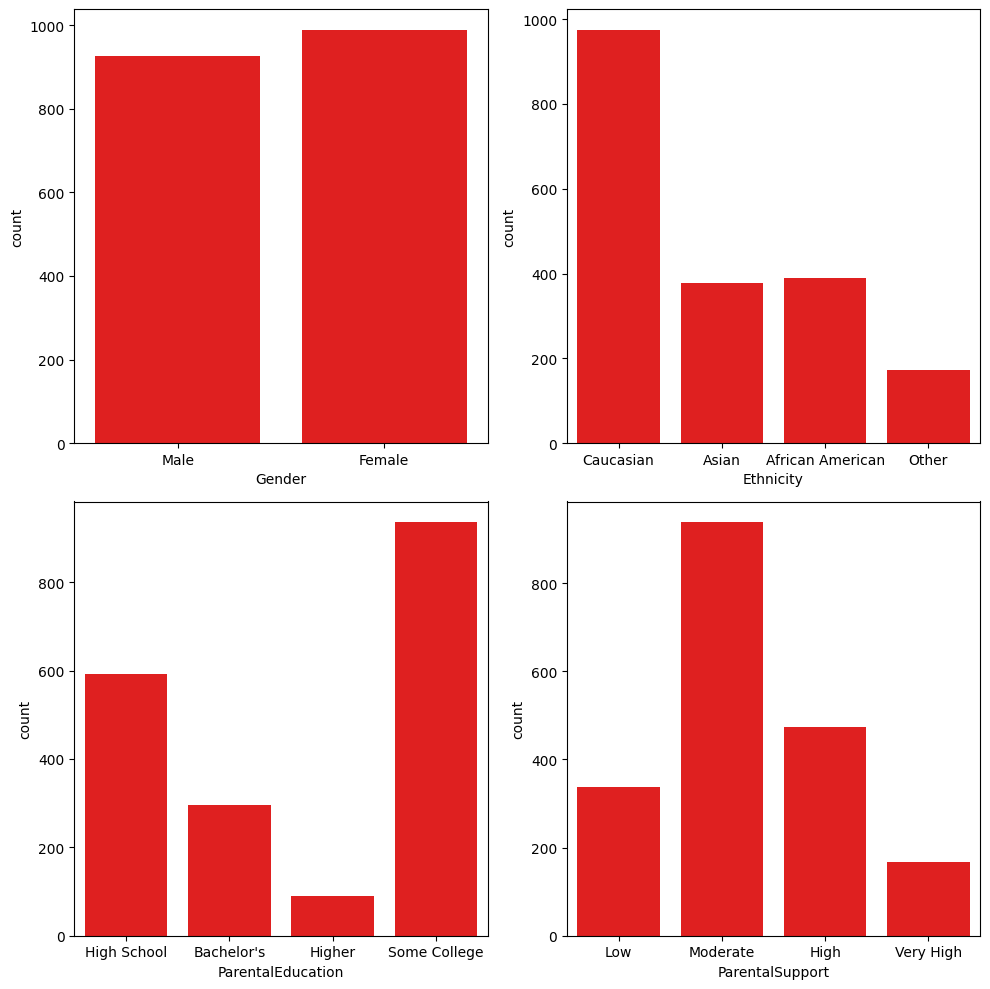

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for index, column_name in enumerate(categorical_column):
    sns.countplot(x=data[column_name], color="red", ax=axes[index])

plt.tight_layout()
plt.show()

#### Bivariate Analysis

Bivariate analysis examines the relationship between two variables, typically with one independent variable and one dependent variable.

Numerical vs Numerical:

We can use scatter plots and compute the correlation. Numerical vs Categorical:

We can use bar plot, box plots, violin plots, or swarm plots. Categorical vs Categorical:

We can use stacked bar plots or grouped bar plots.

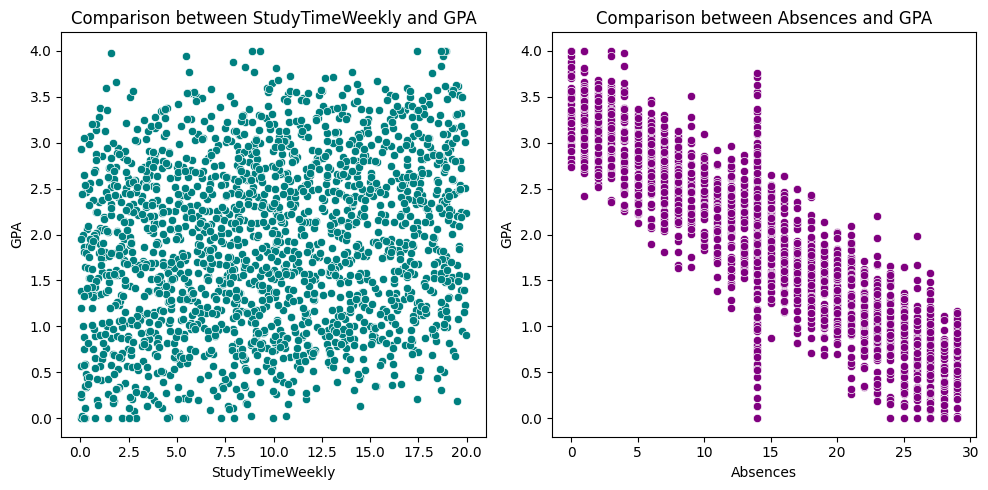

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(x=data["Absences"], y=data["GPA"], color="purple", ax=axes[1])
axes[1].set_title(f"Comparison between Absences and GPA")

sns.scatterplot(x=data["StudyTimeWeekly"], y=data["GPA"], color="teal", ax=axes[0])
axes[0].set_title(f"Comparison between StudyTimeWeekly and GPA")

plt.tight_layout()
plt.show()

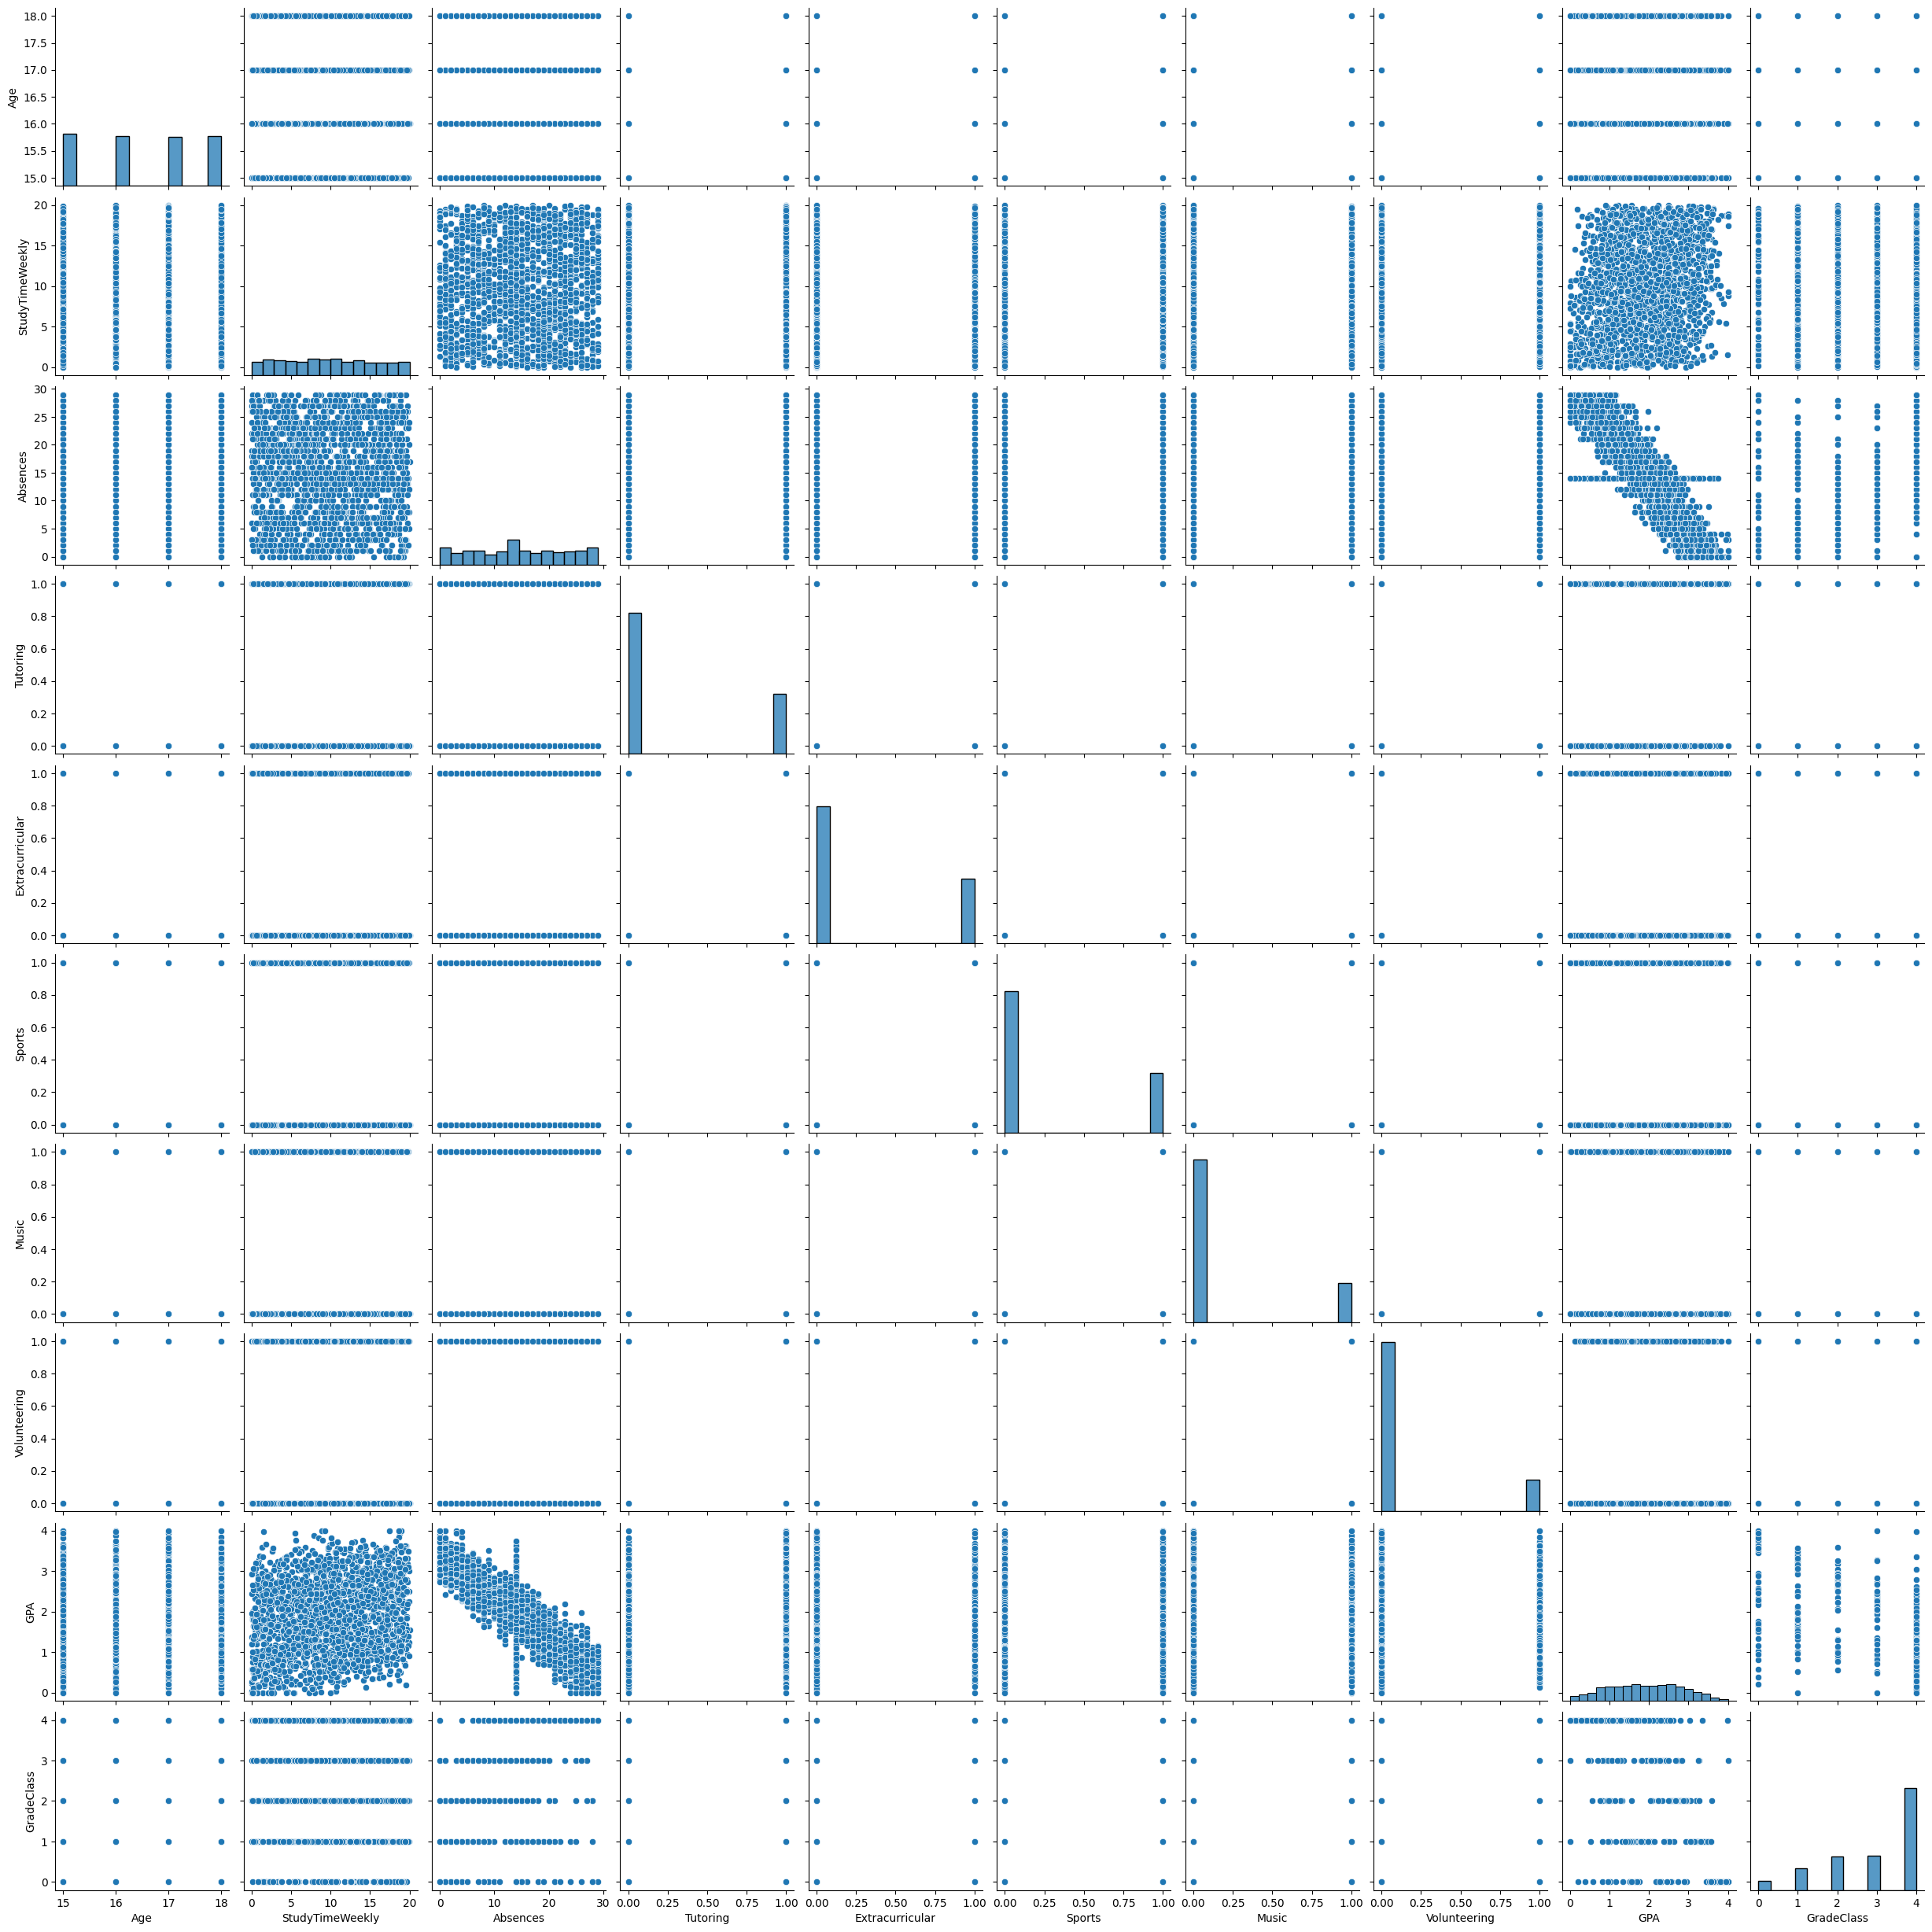

In [124]:
sns.pairplot(data[numerical_column])

#### Numerical vs categorical

In [127]:
data.head()

Age  Gender         Ethnicity ParentalEducation  StudyTimeWeekly  Absences  \
1   18    Male         Caucasian       High School        15.408756       0.0   
2   15    Male             Asian        Bachelor's         4.210570      26.0   
3   17  Female         Caucasian        Bachelor's        10.028829      14.0   
5   18    Male         Caucasian       High School         8.191219       0.0   
7   15  Female  African American            Higher        15.424496      22.0   

   Tutoring ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
1         0             Low                0       0      0             0   
2         0        Moderate                0       0      0             0   
3         0            High                1       0      0             0   
5         0        Moderate                1       0      0             0   
7         1             Low                1       0      0             0   

        GPA  GradeClass  
1  3.042915           1  
2  0.112602           4  
3  2.054218           3  
5  3.084184           1  
7  1.360143           4

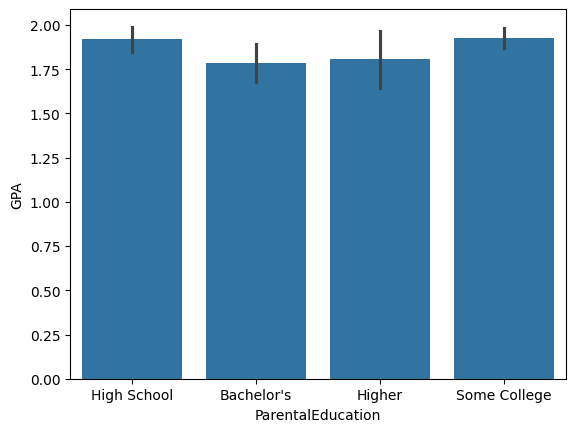

In [137]:
sns.barplot(x=data["ParentalEducation"], y=data["GPA"]);

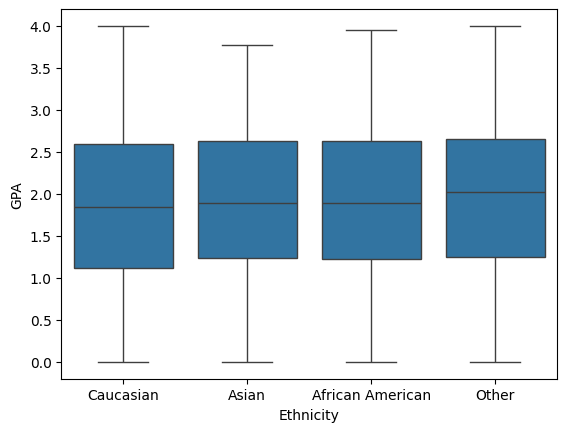

In [133]:
sns.boxplot(x=data["Ethnicity"], y=data["GPA"]);

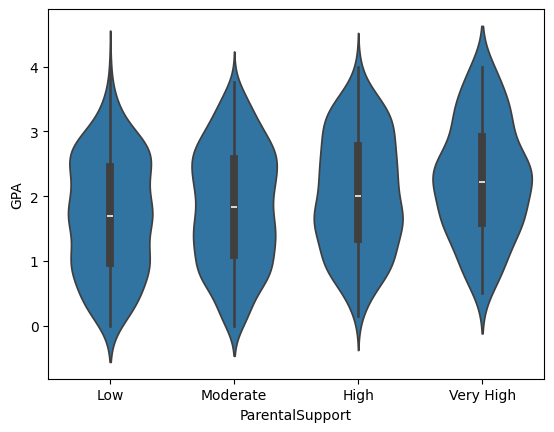

In [139]:
sns.violinplot(x=data["ParentalSupport"], y=data["GPA"], data=data);

#### Multivariate Analysis

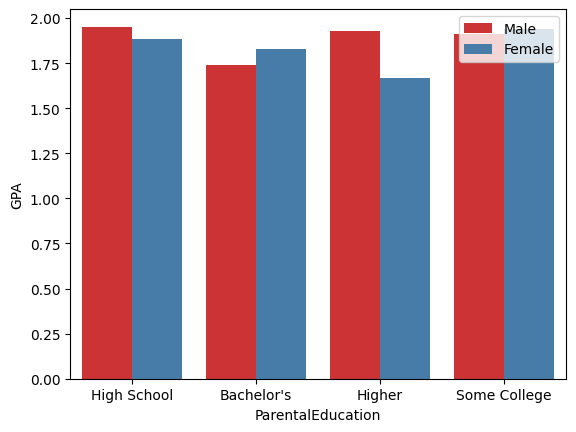

In [152]:
sns.barplot(x="ParentalEducation", y="GPA", hue="Gender", data=data, palette="Set1", errorbar=None);
plt.legend(loc="best");

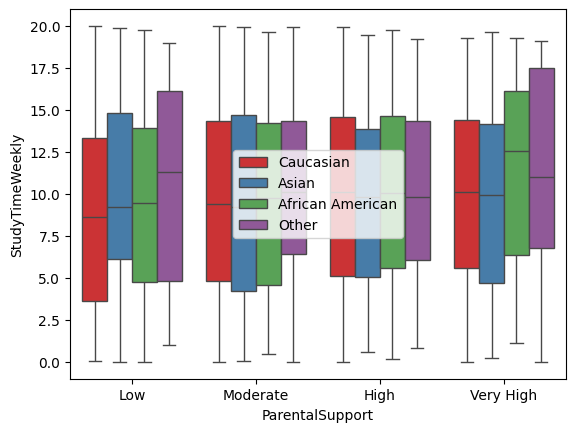

In [156]:
sns.boxplot(x="ParentalSupport", y="StudyTimeWeekly", hue="Ethnicity", data=data, palette="Set1");
plt.legend(loc="best")

In [158]:
numerical_data.head()

Age  StudyTimeWeekly  Absences  Tutoring  Extracurricular  Sports  Music  \
0   36        19.833723       NaN         1                0       0      1   
1   18        15.408756       0.0         0                0       0      0   
2   15         4.210570      26.0         0                0       0      0   
3   17        10.028829      14.0         0                1       0      0   
4   36         4.672495      17.0         1                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196           2  
1             0  3.042915           1  
2             0  0.112602           4  
3             0  2.054218           3  
4             0  1.288061           4

In [160]:
correlation_map = numerical_data.corr()

<Axes: >

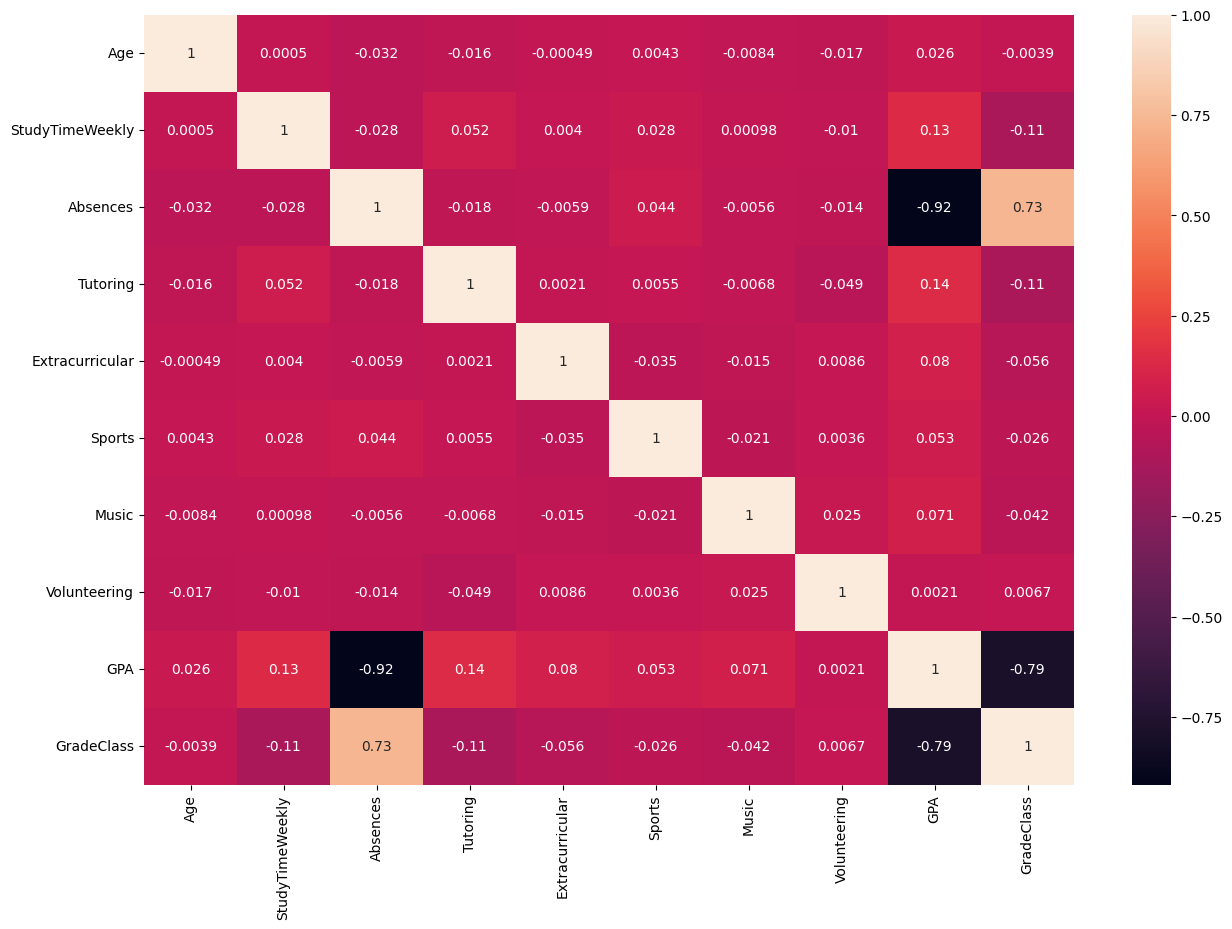

In [162]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_map, annot=True)

#### Using Dashboards to convey findings

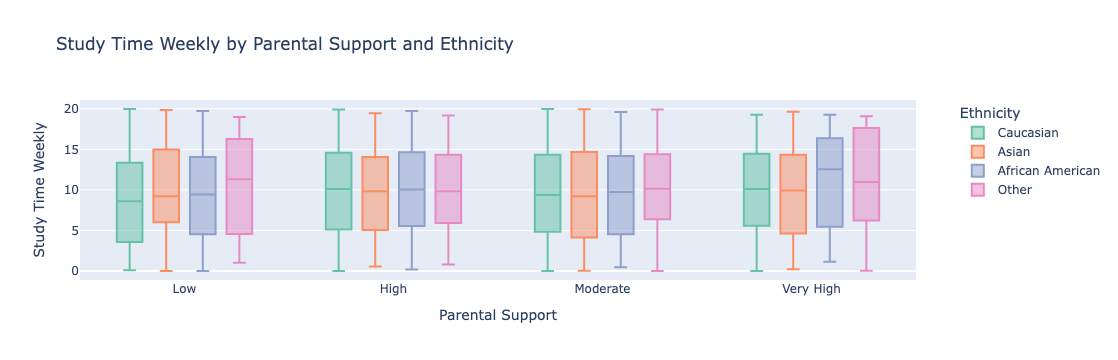

In [171]:
# Create a boxplot using Plotly
fig = px.box(data, x="ParentalSupport", y="StudyTimeWeekly", color="Ethnicity", 
             title="Study Time Weekly by Parental Support and Ethnicity", 
             labels={"ParentalSupport": "Parental Support", "StudyTimeWeekly": "Study Time Weekly"},
             color_discrete_sequence=px.colors.qualitative.Set2)

# Update the layout for better display
fig.update_layout(legend_title_text='Ethnicity', legend=dict(x=1.05, y=1))

# Show the plot
fig.show()

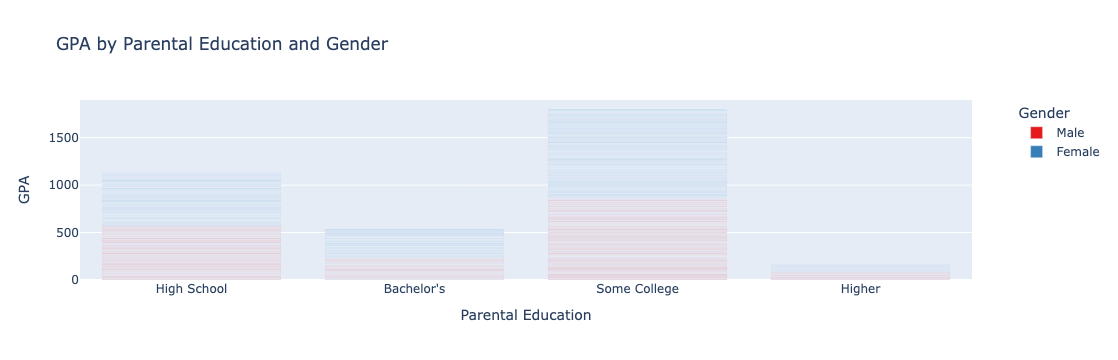

In [193]:
# Create a bar plot using Plotly
fig = px.bar(data, x="ParentalEducation", y="GPA", color="Gender", 
             title="GPA by Parental Education and Gender", 
             labels={"ParentalEducation": "Parental Education", "GPA": "GPA"},
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update the layout for better display
fig.update_layout(legend_title_text='Gender', legend=dict(x=1.05, y=1))

# Show the plot
fig.show()

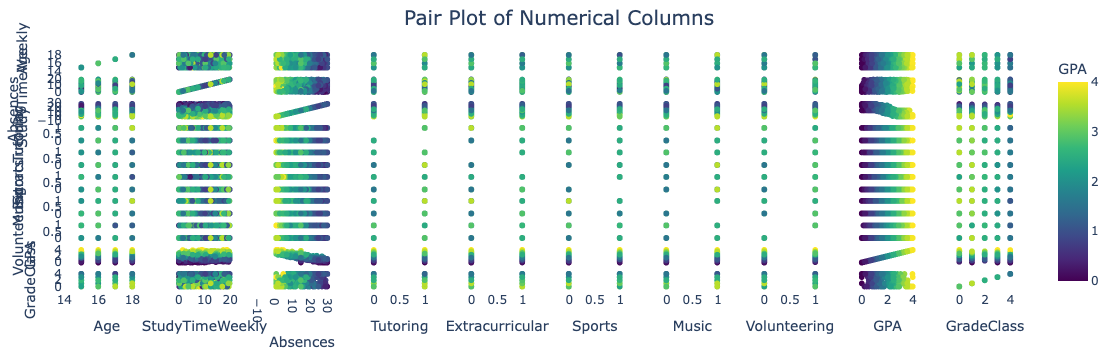

In [203]:
# Create a pair plot using Plotly
fig = px.scatter_matrix(data[numerical_column],
                        title="Pair Plot of Numerical Columns",
                        dimensions=numerical_column,
                        color="GPA",  # Replace 'Gender' with a valid categorical column
                        labels={col: col.replace('_', ' ') for col in data[numerical_column].columns},  # Clean up labels
                        color_continuous_scale=px.colors.sequential.Viridis)  # Use a clearer color scale

# Update the layout for better display
fig.update_layout(
    title="Pair Plot of Numerical Columns",
    title_font_size=20,
    title_x=0.5,
    margin=dict(l=50, r=50, b=50, t=50),
    font=dict(size=12),
    plot_bgcolor='white'
)

# Show the plot
fig.show()

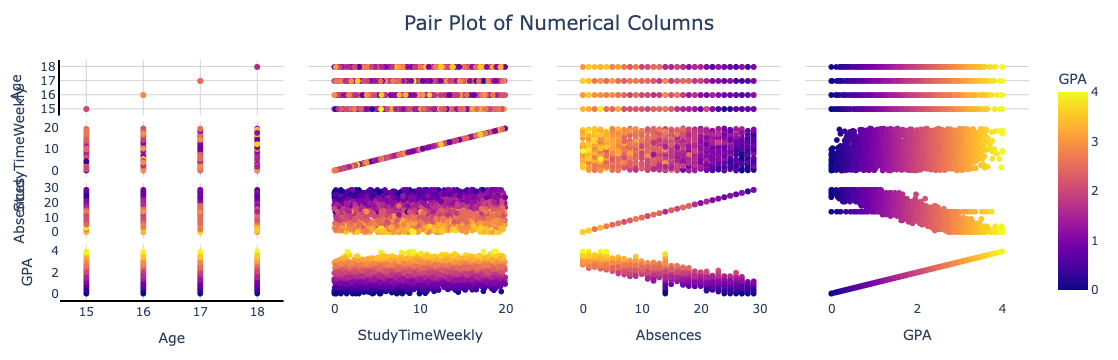

In [211]:
# Create a pair plot using Plotly
fig = px.scatter_matrix(data[numerical_column],
                        title="Pair Plot of Numerical Columns",
                        dimensions=numerical_column,
                        color="GPA",  # Replace 'Gender' with a valid categorical column
                        labels={col: col.replace('_', ' ') for col in data[numerical_column].columns},  # Clean up labels
                        color_continuous_scale=px.colors.sequential.Plasma)  # Using a distinct color scale

# Update the layout for better display
fig.update_layout(
    title="Pair Plot of Numerical Columns",
    title_font_size=20,
    title_x=0.5,
    margin=dict(l=60, r=60, b=60, t=60),  # Adjusting margins
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Update the axes for better readability
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')

# Show the plot
fig.show()


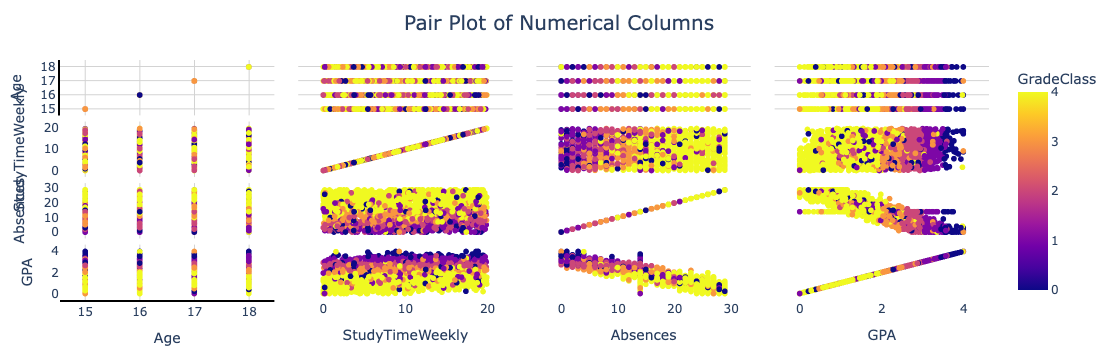

In [209]:
# List of numerical columns
numerical_column = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Create a pair plot using Plotly
fig = px.scatter_matrix(data[numerical_column + ['GradeClass']],  # Include a valid categorical column like 'GradeClass'
                        title="Pair Plot of Numerical Columns",
                        dimensions=numerical_column,
                        color="GradeClass",  # Replace 'GradeClass' with a valid column for coloring
                        labels={col: col.replace('_', ' ') for col in numerical_column},  # Clean up labels
                        color_discrete_sequence=px.colors.sequential.Plasma)  # Using a distinct color scale

# Update the layout for better display
fig.update_layout(
    title="Pair Plot of Numerical Columns",
    title_font_size=20,
    title_x=0.5,
    margin=dict(l=60, r=60, b=60, t=60),  # Adjusting margins
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Update the axes for better readability
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')

# Show the plot
fig.show()

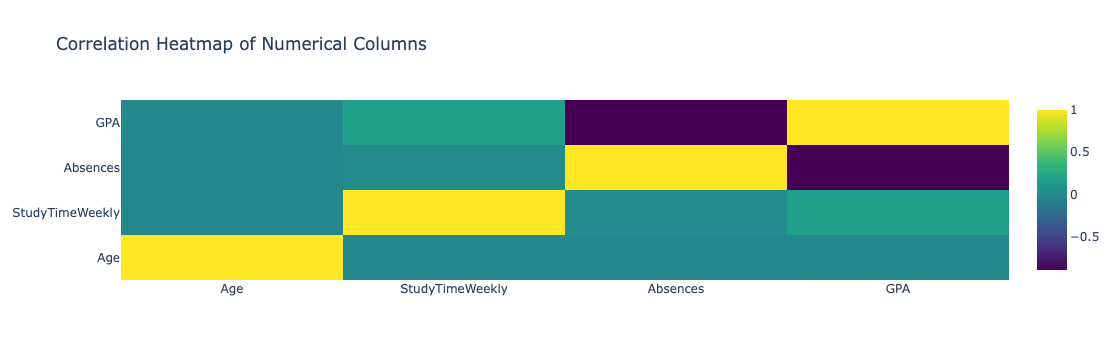

In [217]:
# Compute correlation matrix
corr_matrix = data[numerical_column].corr()

# Create heatmap
heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis'
))

heatmap.update_layout(title='Correlation Heatmap of Numerical Columns',
                      xaxis_nticks=36)

heatmap.show()

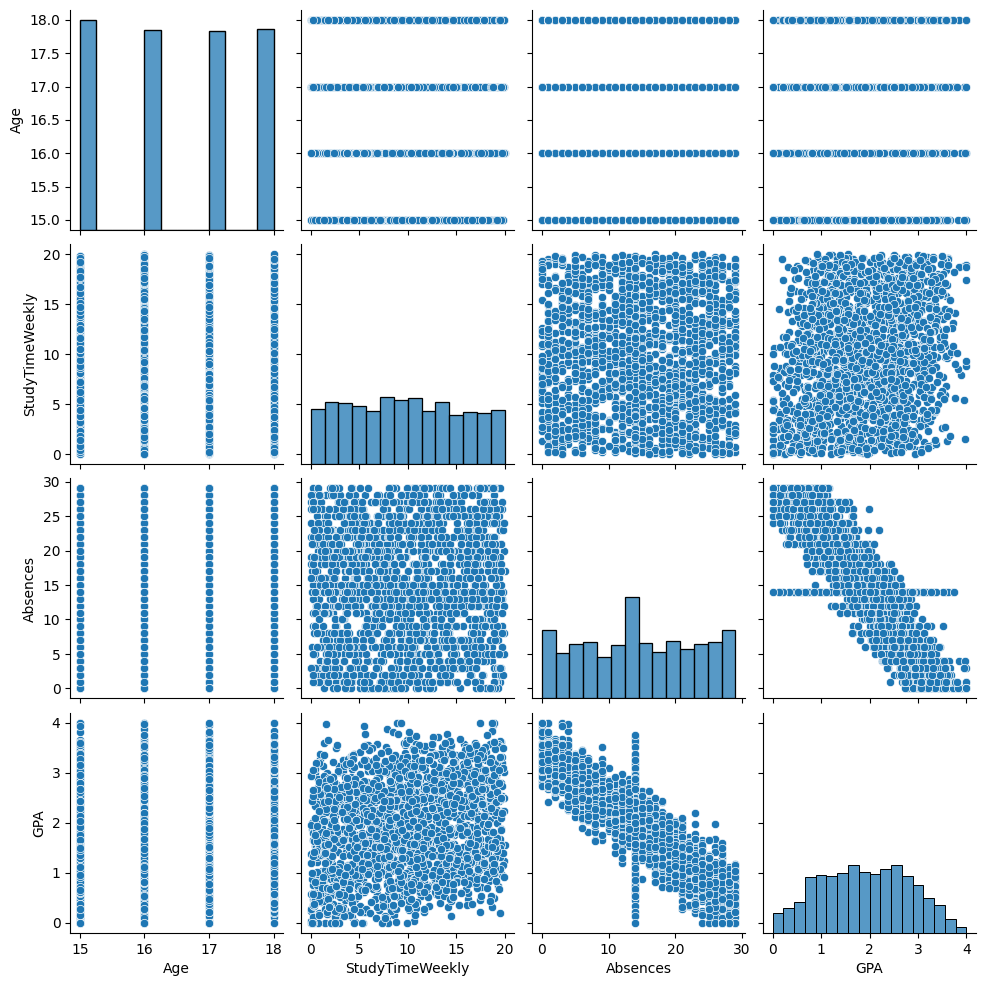

In [221]:
sns.pairplot(data[numerical_column])
plt.show()

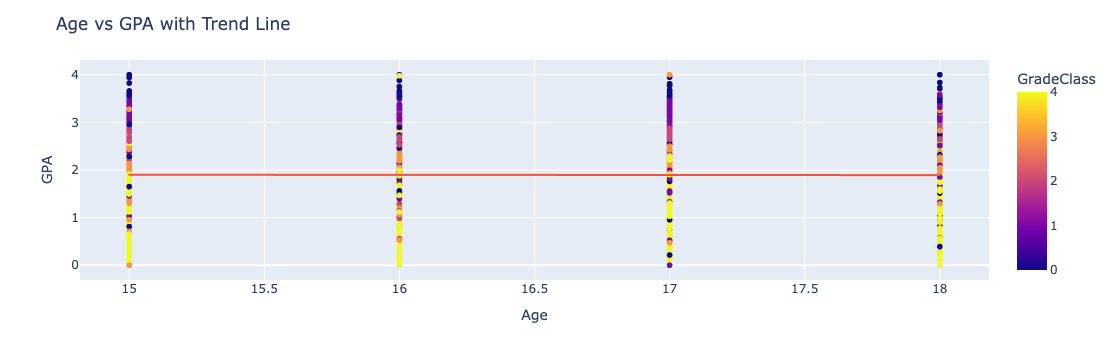

In [229]:
fig = px.scatter(data, x='Age', y='GPA', color='GradeClass', trendline='ols')
fig.update_layout(title='Age vs GPA with Trend Line',
                  xaxis_title='Age',
                  yaxis_title='GPA')
fig.show()

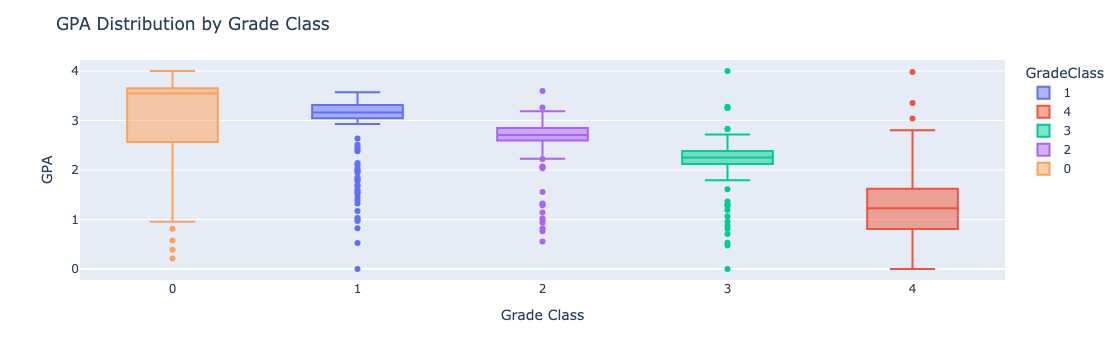

In [231]:
fig = px.box(data, x='GradeClass', y='GPA', color='GradeClass')
fig.update_layout(title='GPA Distribution by Grade Class',
                  xaxis_title='Grade Class',
                  yaxis_title='GPA')
fig.show()

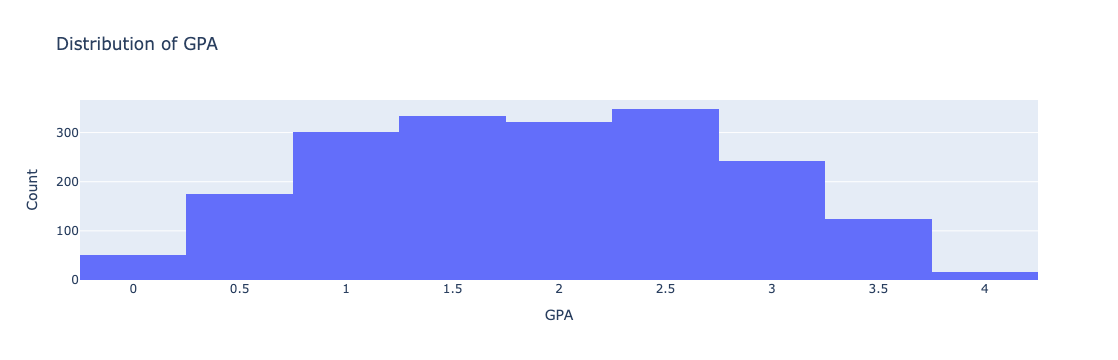

In [235]:
fig = px.histogram(data, x='GPA', nbins=20, title='Distribution of GPA') 
fig.update_layout(xaxis_title='GPA', yaxis_title='Count')
fig.show()

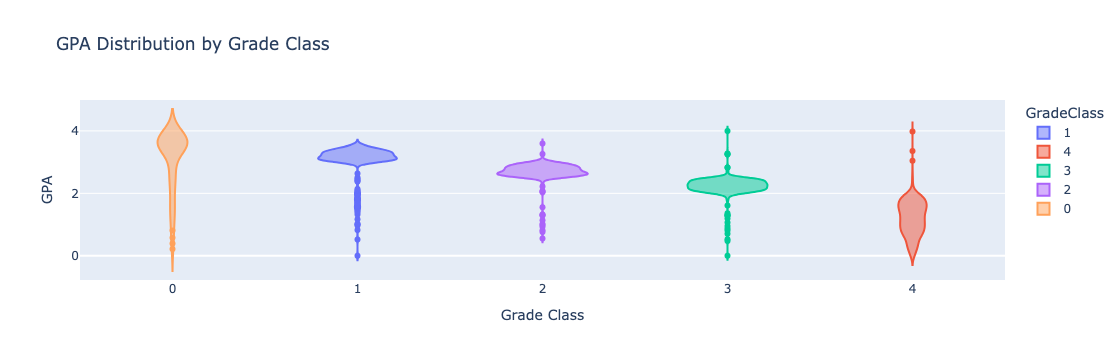

In [237]:
fig = px.violin(data, x='GradeClass', y='GPA', color='GradeClass', title='GPA Distribution by Grade Class') 
fig.update_layout(xaxis_title='Grade Class', yaxis_title='GPA') 
fig.show()

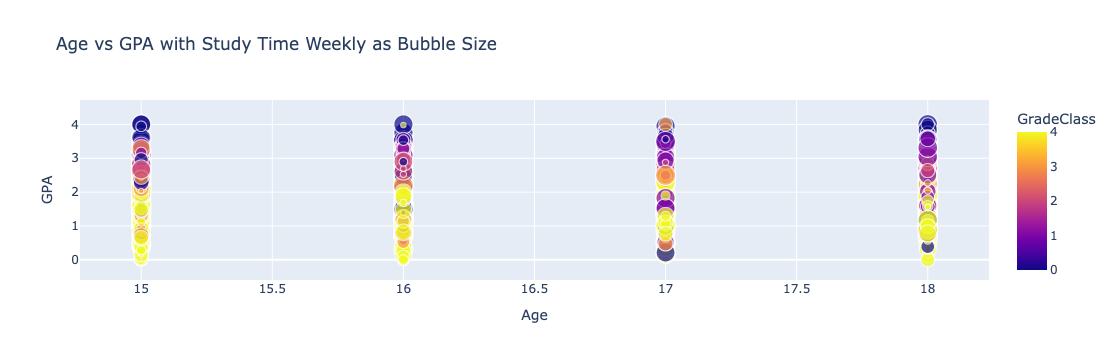

In [239]:
fig = px.scatter(data, x='Age', y='GPA', size='StudyTimeWeekly', color='GradeClass',
                 title='Age vs GPA with Study Time Weekly as Bubble Size')
fig.update_layout(xaxis_title='Age', yaxis_title='GPA')
fig.show()

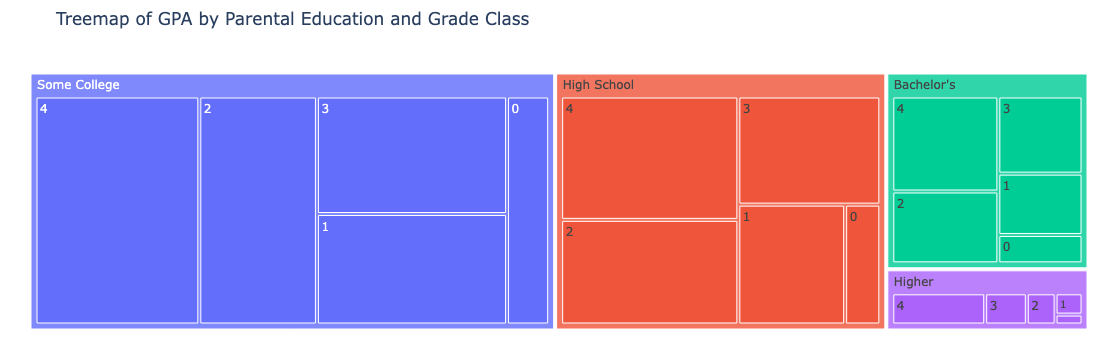

In [241]:
fig = px.treemap(data, path=['ParentalEducation', 'GradeClass'], values='GPA',
                 title='Treemap of GPA by Parental Education and Grade Class')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

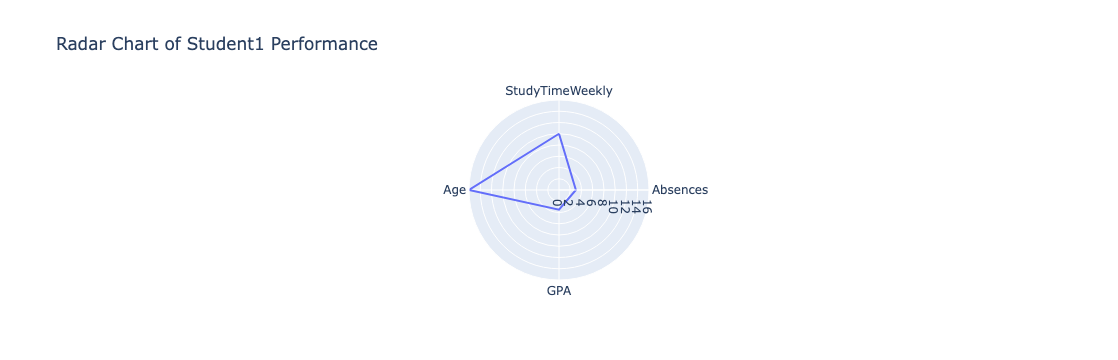

In [243]:
# Example data for radar chart
radar_data = pd.DataFrame({
    'Variable': ['StudyTimeWeekly', 'Absences', 'GPA', 'Age'],
    'Student1': [10, 3, 3.5, 16],
    'Student2': [8, 1, 3.8, 15],
    'Student3': [6, 5, 3.2, 17]
})

fig = px.line_polar(radar_data, r='Student1', theta='Variable', line_close=True,
                    title='Radar Chart of Student1 Performance')
fig.update_layout(polar=dict(radialaxis=dict(visible=True)))
fig.show()

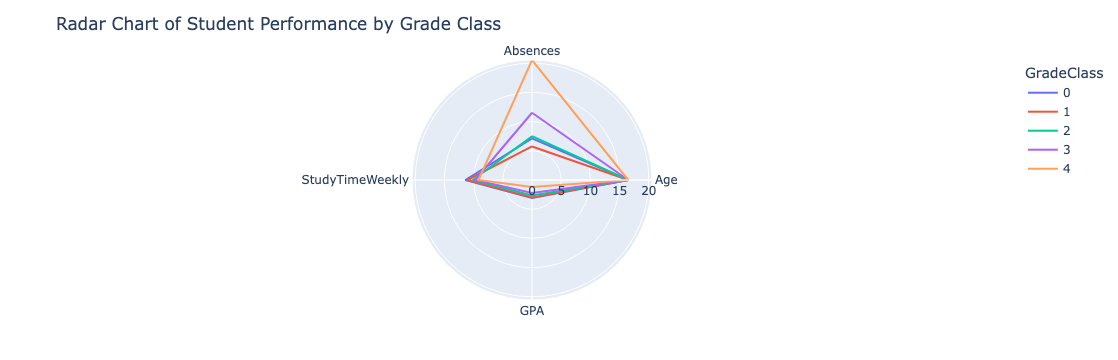

In [245]:
# Let's assume you want to visualize 'StudyTimeWeekly', 'Absences', 'GPA', and 'Age'
numerical_columns = ['StudyTimeWeekly', 'Absences', 'GPA', 'Age']

# Prepare the data for the radar chart
radar_data = pd.melt(data, id_vars=['GradeClass'], value_vars=numerical_columns, var_name='Variable', value_name='Value')

# Example: Aggregating the data by 'GradeClass' for visualization
radar_agg = radar_data.groupby(['GradeClass', 'Variable']).mean().reset_index()

# Create the radar chart
fig = px.line_polar(radar_agg, r='Value', theta='Variable', color='GradeClass', line_close=True,
                    title='Radar Chart of Student Performance by Grade Class')

# Update the layout for better display
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    margin=dict(l=60, r=60, b=60, t=60)  # Adjusting margins
)

# Show the plot
fig.show()